In [20]:
import matplotlib.pylab as plt
import numpy as np
plt.style.use(["science","no-latex","/afs/ihep.ac.cn/users/l/luoxj/Style/Paper.mplstyle"])
%config InlineBackend.figure_format = 'svg'
#plt.rcParams['figure.dpi'] = 300
#plt.rcParams['savefig.dpi'] = 300
import sys
sys.path.append("/afs/ihep.ac.cn/users/l/luoxj/root_tool/python_script/")

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


In [50]:
from LoadMultiFiles import LoadOneFileUproot,LoadMultiROOTFiles
from copy import copy
import seaborn as sns
sns.set_context("talk")
filter_leaves = ['xyz_center', 'step_x', 'step_y', 'step_z',  'step_Edep', 'step_Equench']

# v_BeamX = [-2.4, -1.5, 0, 1.5 , 2.4]
# v_BeamX = [-2.4, -1.5, 0, 1.5 , 2.4]
# v_BeamX = [-2.4, -2.0,-1.5,-1.0, 0, 1.0,1.5 ,2.0, 2.4]
v_BeamX = [ 0, 1.0,1.5 ,2.0, 2.4]
template_root_path = "/afs/ihep.ac.cn/users/l/luoxj/JUNO_G4_Simulation/optical_run/beam_diff_position/root/He_4_LS_5mm_tank_1mm_Acrylic_BeamX_{}cm_*.root"

dir_PMT_diff_x = {}
for x in v_BeamX:
    dir_PMT = LoadMultiROOTFiles(template_root_path.format(x), name_branch="PMT_log", list_branch_filter=filter_leaves)
    dir_PMT_diff_x[x] = copy(dir_PMT)


/afs/ihep.ac.cn/users/l/luoxj/root_tool/python_script/LoadMultiFiles.py:199: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  dir_events[key] = np.array(dir_events[key])


In [22]:
from collections import Counter
from FunctionFor_dE_dx import GetNPE
import pandas as pd
dir_nPE = {"NPE":[], "BeamX":[], "tag":[]}

for key, dir_PMT in dir_PMT_diff_x.items():
    v_NPE_PMT0 = GetNPE(dir_PMT, chamberID=0, mean=False)
    dir_nPE["NPE"] += list(v_NPE_PMT0)
    dir_nPE["BeamX"] += [key]*len(v_NPE_PMT0)
    dir_nPE["tag"] += ["$PMT_0$"]*len(v_NPE_PMT0)

    v_NPE_PMT1 = GetNPE(dir_PMT, chamberID=1, mean=False)
    dir_nPE["NPE"] += list(v_NPE_PMT1)
    dir_nPE["BeamX"] += [key]*len(v_NPE_PMT1)
    dir_nPE["tag"] += ["$PMT_1$"]*len(v_NPE_PMT1)

    v_NPE = v_NPE_PMT0+v_NPE_PMT1
    dir_nPE["NPE"] += list(v_NPE)
    dir_nPE["BeamX"] += [key]*len(v_NPE)
    dir_nPE["tag"] += ["$PMT_0+PMT_1$"]*len(v_NPE)

for key, item in dir_nPE.items():
    print(key, len(item))
df_NPE = pd.DataFrame.from_dict(dir_nPE)
df_NPE

NPE 29700
BeamX 29700
tag 29700


,NPE,BeamX,tag
0,555,0.0,$PMT_0$
1,600,0.0,$PMT_0$
2,647,0.0,$PMT_0$
3,585,0.0,$PMT_0$
4,660,0.0,$PMT_0$
...,...,...,...
29695,1333,2.4,$PMT_0+PMT_1$
29696,1467,2.4,$PMT_0+PMT_1$
29697,1393,2.4,$PMT_0+PMT_1$
29698,1494,2.4,$PMT_0+PMT_1$


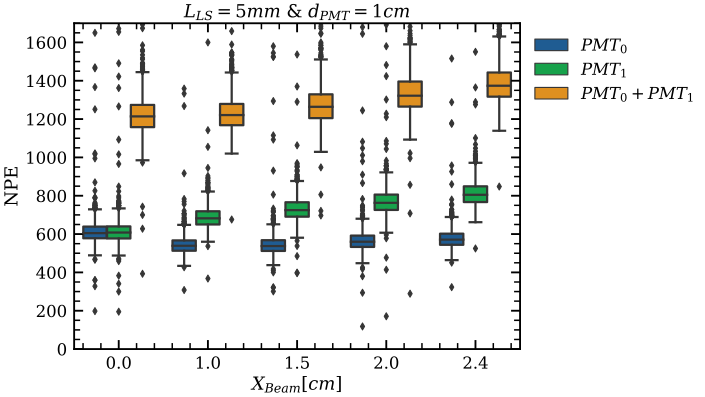

In [30]:
# plt.bar(dir_nPE_diff_BeamX.keys(), dir_nPE_diff_BeamX.values(),width=.3)
import seaborn as sns
B = sns.boxplot(x="BeamX", y="NPE",data=df_NPE,hue="tag")
# sns.boxplot(x="BeamX", y="$PMT_1$", data=df_NPE)
# sns.boxplot(x="BeamX", y="$PMT_0$", data=df_NPE)

# sns.scatterplot(data=pd.DataFrame.from_dict(dir_nPE_diff_BeamX))
# for key, v_nPE in dir_nPE_diff_BeamX.items():
#     plt.scatter([key]*len(v_nPE), v_nPE, label=f"X = {key} cm")
plt.xlabel("$X_{Beam} [ cm ]$")
plt.ylabel("NPE")
plt.title("$L_{LS}=5mm\ &\ d_{PMT}=1 cm$")
plt.ylim(0, 1700)
plt.legend(bbox_to_anchor=(1,1))


In [31]:
from IPython.display import display
df_results = df_NPE.groupby(["BeamX", "tag"])["NPE"].describe().unstack()
df_results["50%"]

tag,$PMT_0$,$PMT_0+PMT_1$,$PMT_1$
BeamX,,,
0.0,605.0,1214.0,608.0
1.0,539.0,1221.0,682.0
1.5,537.5,1264.0,725.0
2.0,560.0,1322.0,763.0
2.4,571.0,1374.0,805.0


(0.8525, 16.1975)

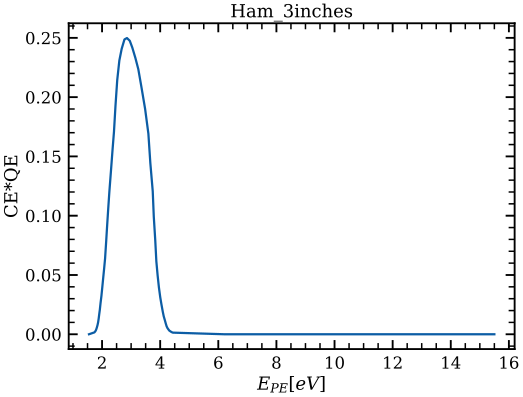

In [25]:
v_Ek = [    1.55,
            1.737,
            1.769,
            1.791,
            1.808,
            1.825,
            1.844,
            1.864,
            1.884,
            1.904,
            1.923,
            1.947,
            1.978,
            2.008,
            2.041,
            2.069,
            2.104,
            2.141,
            2.174,
            2.211,
            2.251,
            2.303,
            2.361,
            2.410,
            2.462,
            2.522,
            2.595,
            2.675,
            2.771,
            2.857,
            2.954,
            3.040,
            3.147,
            3.248,
            3.355,
            3.482,
            3.594,
            3.661,
            3.744,
            3.780,
            3.831,
            3.868,
            3.912,
            3.956,
            4.002,
            4.043,
            4.090,
            4.122,
            4.161,
            4.194,
            4.222,
            4.251,
            4.286,
            4.315,
            4.363,
            4.394,
            4.437,
            6.200,
            10.33,15.5]
v_eff_PE = [
        0.00001,
    0.00159,
    0.00255,
    0.00355,
    0.00469,
    0.00605,
    0.00774,
    0.01003,
    0.01325,
    0.01718,
    0.02059,
    0.02608,
    0.03229,
    0.03960,
    0.04790,
    0.05480,
    0.06387,
    0.07797,
    0.09129,
    0.10541,
    0.12003,
    0.13668,
    0.15564,
    0.17078,
    0.19267,
    0.21437,
    0.23089,
    0.24073,
    0.24868,
    0.24983,
    0.24753,
    0.24185,
    0.23304,
    0.22351,
    0.20848,
    0.19001,
    0.16920,
    0.14451,
    0.12059,
    0.09924,
    0.07906,
    0.06154,
    0.04971,
    0.03960,
    0.03126,
    0.02525,
    0.01894,
    0.01516,
    0.01185,
    0.00893,
    0.00670,
    0.00521,
    0.00400,
    0.00307,
    0.00229,
    0.00181,
    0.00137,
    0.00001,
    0.00001,
    0.00001
]
plt.plot(v_Ek,v_eff_PE)
plt.xlabel("$E_{PE} [ eV ]$")
plt.ylabel("CE*QE")
plt.title("Ham_3inches")
plt.xlim()

(1.5, 5.0)

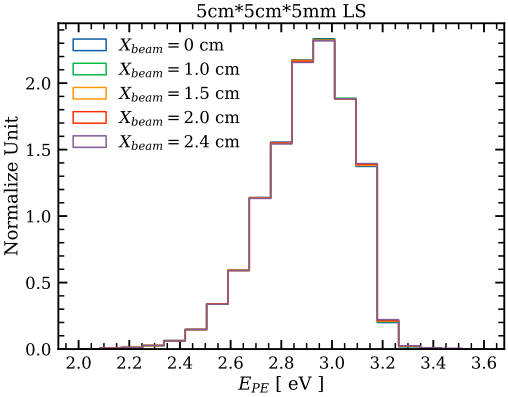

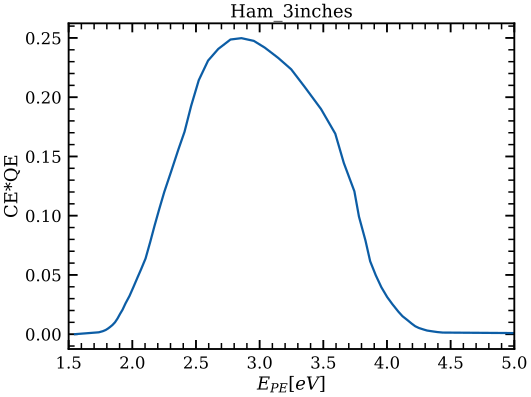

In [26]:
for X, dir_PMT in dir_PMT_diff_x.items():
    # for i_evt in range(len(dir_PMT["step_trackID"])):
    #     print(Counter(dir_PMT["step_trackID"][i_evt]))
    h = plt.hist(np.concatenate(dir_PMT['step_KineticE'])*1e6, histtype="step", bins=np.linspace(2, 3.6, 20), label="$X_{beam}=$"+f"{X} cm", density=True)
plt.legend(loc="upper left")
plt.xlabel("$E_{PE}$ [ eV ]")
plt.ylabel("Normalize Unit")
plt.title("5cm*5cm*5mm LS")

plt.figure()
plt.plot(v_Ek,v_eff_PE)
plt.xlabel("$E_{PE} [ eV ]$")
plt.ylabel("CE*QE")
plt.title("Ham_3inches")
plt.xlim(1.5,5)

# Optimize Far PMT Distance

(-1.0, 25.0)

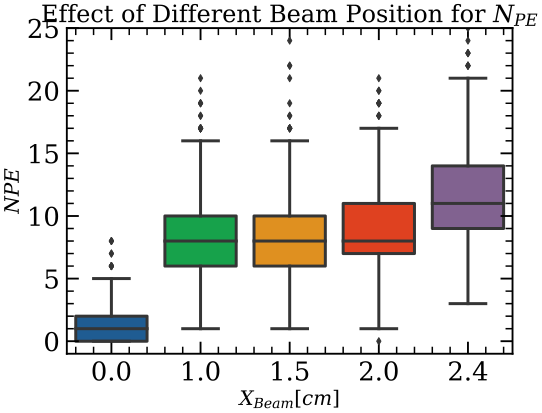

In [52]:
dir_PE = {"NPE":[], "BeamX":[]}
for key, dir_PMT in dir_PMT_diff_x.items():
    v_NPE =  GetNPE(dir_PMT, chamberID=2, mean=False)
    dir_PE["NPE"] += list(v_NPE)
    dir_PE["BeamX"] += [key]*len(v_NPE)

import pandas as pd
import seaborn as sns
df_PE = pd.DataFrame.from_dict(dir_PE)
sns.boxplot(x="BeamX", y="NPE",data=df_PE)
plt.xlabel("$X_{Beam} [ cm ]$")
plt.ylabel("$NPE$")
plt.title("Effect of Different Beam Position for $N_{PE}$")
plt.ylim(-1, 25)

1.2949494949494949


/tmp/ipykernel_31540/878012584.py:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  v_deltaT = np.concatenate( [np.diff( sorted(v_PE_time)) for v_PE_time in np.array(v2d_PE_time)[v_NPE==2]] )


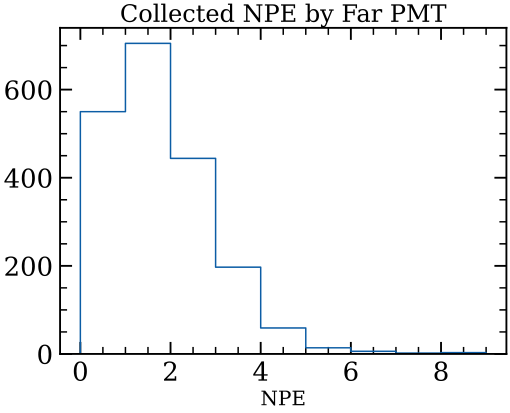

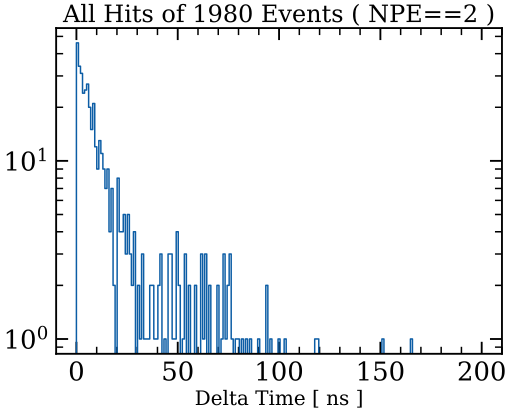

In [75]:
from importlib import reload
import FunctionFor_dE_dx
reload( FunctionFor_dE_dx )
from FunctionFor_dE_dx import GetSiNPE, GetSiPETime, GetNPE
plt.figure("NPE")
plt.figure("DeltaT")
for key, dir_PMT in dir_PMT_diff_x.items():
    plt.figure("NPE")
    print( np.mean( GetNPE(dir_PMT,chamberID=2,mean=False) ))
    v_NPE = np.array( GetNPE(dir_PMT,chamberID=2,mean=False) )
    plt.hist(v_NPE,bins=range(0, 10), histtype="step")
    plt.xlabel("NPE")
    plt.title("Collected NPE by Far PMT")

    v2d_PE_time = GetSiPETime(dir_PMT,chamberID=2)

    plt.figure("DeltaT")
    v_deltaT = np.concatenate( [np.diff( sorted(v_PE_time)) for v_PE_time in np.array(v2d_PE_time)[v_NPE==2]] )
    plt.hist(v_deltaT,bins=np.linspace(0, 200, 200),histtype="step")
    plt.xlabel("Delta Time [ ns ]")
    plt.title(f"All Hits of {len(v2d_PE_time)} Events ( NPE==2 )")
    plt.semilogy()
    break